In [1]:
# === LIBRERIE ===
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import StandardScaler

np.random.seed(42)

In [2]:
# === FUNZIONI ===

def remove_uniform_square_var(image, square_size=5, var_threshold=0.01):
    h, w, c = image.shape
    min_var = float('inf')
    best_coords = (0, 0)

    for i in range(h - square_size + 1):
        for j in range(w - square_size + 1):
            patch = image[i:i+square_size, j:j+square_size, :]
            patch_var = np.var(patch, axis=(0,1))
            mean_var = np.mean(patch_var)
            if mean_var < min_var:
                min_var = mean_var
                best_coords = (i, j)

    if min_var < var_threshold:
        i, j = best_coords

        top = max(i-1, 0)
        bottom = min(i+square_size+1, h)
        left = max(j-1, 0)
        right = min(j+square_size+1, w)

        border_pixels = []

        if top < i:
            border_pixels.append(image[top, left:right, :])
        if bottom > i + square_size:
            border_pixels.append(image[bottom-1, left:right, :])
        if left < j:
            border_pixels.append(image[top:bottom, left, :])
        if right > j + square_size:
            border_pixels.append(image[top:bottom, right-1, :])

        if border_pixels:
            border_pixels = np.concatenate(border_pixels, axis=0)
            mean_color = np.mean(border_pixels, axis=0)
        else:
            mean_color = np.mean(image.reshape(-1, c), axis=0)

        image[i:i+square_size, j:j+square_size, :] = mean_color

    return image

def clean_dataset(images, square_size=5, var_threshold=0.01):
    cleaned_images = np.empty_like(images)
    for idx in range(images.shape[0]):
        cleaned_images[idx] = remove_uniform_square_var(images[idx].copy(), square_size, var_threshold)
    return cleaned_images

In [3]:
# === CARICAMENTO DATI ===
x_train = np.load("/kaggle/input/cifar10-hw3/cifar_hw3/x_train.npy")
y_train = np.load("/kaggle/input/cifar10-hw3/cifar_hw3/y_train.npy")
x_val   = np.load("/kaggle/input/cifar10-hw3/cifar_hw3/x_val.npy")
y_val   = np.load("/kaggle/input/cifar10-hw3/cifar_hw3/y_val.npy")
x_test  = np.load("/kaggle/input/cifar10-hw3/cifar_hw3/x_test.npy")
y_test  = np.load("/kaggle/input/cifar10-hw3/cifar_hw3/y_test.npy")

# === RAVEL LABELS ===
y_train = y_train.ravel()
y_val = y_val.ravel()
y_test = y_test.ravel()

In [4]:
# === NORMALIZZAZIONE ===
x_train = x_train.astype(np.float32) / 255.0
x_val   = x_val.astype(np.float32) / 255.0
x_test  = x_test.astype(np.float32) / 255.0

# === RIMOZIONE PATCH ===
x_train = clean_dataset(x_train, square_size=5, var_threshold=0.01)

In [5]:
# === FLATTEN + STANDARDIZZAZIONE ===
x_train = x_train.reshape(x_train.shape[0], -1)
x_val = x_val.reshape(x_val.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)


Training MLP con params: {'activation': 'relu', 'alpha': 1e-05, 'hidden_layer_sizes': (200,), 'learning_rate_init': 0.001, 'solver': 'adam'}


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 1/100 - Validation accuracy: 0.4263
Epoch 2/100 - Validation accuracy: 0.4509
Epoch 3/100 - Validation accuracy: 0.4673
Epoch 4/100 - Validation accuracy: 0.4685
Epoch 5/100 - Validation accuracy: 0.4772
Epoch 6/100 - Validation accuracy: 0.4855
Epoch 7/100 - Validation accuracy: 0.4929
Epoch 8/100 - Validation accuracy: 0.4953
Epoch 9/100 - Validation accuracy: 0.4963
Epoch 10/100 - Validation accuracy: 0.4995
Epoch 11/100 - Validation accuracy: 0.4964
Epoch 12/100 - Validation accuracy: 0.4923
Epoch 13/100 - Validation accuracy: 0.4865
Epoch 14/100 - Validation accuracy: 0.4859
Epoch 15/100 - Validation accuracy: 0.4814
Epoch 16/100 - Validation accuracy: 0.4828
Epoch 17/100 - Validation accuracy: 0.4777
Epoch 18/100 - Validation accuracy: 0.4749
Epoch 19/100 - Validation accuracy: 0.4720
Epoch 20/100 - Validation accuracy: 0.4730
Early stopping all'epoca 20 per params {'activation': 'relu', 'alpha': 1e-05, 'hidden_layer_sizes': (200,), 'learning_rate_init': 0.001, 'solver': 'a

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 1/100 - Validation accuracy: 0.4275
Epoch 2/100 - Validation accuracy: 0.4577
Epoch 3/100 - Validation accuracy: 0.4656
Epoch 4/100 - Validation accuracy: 0.4825
Epoch 5/100 - Validation accuracy: 0.4849
Epoch 6/100 - Validation accuracy: 0.4848
Epoch 7/100 - Validation accuracy: 0.4879
Epoch 8/100 - Validation accuracy: 0.4881
Epoch 9/100 - Validation accuracy: 0.4861
Epoch 10/100 - Validation accuracy: 0.4851
Epoch 11/100 - Validation accuracy: 0.4864
Epoch 12/100 - Validation accuracy: 0.4812
Epoch 13/100 - Validation accuracy: 0.4819
Epoch 14/100 - Validation accuracy: 0.4720
Epoch 15/100 - Validation accuracy: 0.4730
Epoch 16/100 - Validation accuracy: 0.4682
Epoch 17/100 - Validation accuracy: 0.4702
Epoch 18/100 - Validation accuracy: 0.4664
Early stopping all'epoca 18 per params {'activation': 'relu', 'alpha': 1e-05, 'hidden_layer_sizes': (200, 100), 'learning_rate_init': 0.001, 'solver': 'adam'}

Training MLP con params: {'activation': 'relu', 'alpha': 1e-05, 'hidden_lay

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 1/100 - Validation accuracy: 0.4345
Epoch 2/100 - Validation accuracy: 0.4597
Epoch 3/100 - Validation accuracy: 0.4730
Epoch 4/100 - Validation accuracy: 0.4845
Epoch 5/100 - Validation accuracy: 0.4904
Epoch 6/100 - Validation accuracy: 0.5023
Epoch 7/100 - Validation accuracy: 0.4914
Epoch 8/100 - Validation accuracy: 0.4926
Epoch 9/100 - Validation accuracy: 0.4882
Epoch 10/100 - Validation accuracy: 0.4909
Epoch 11/100 - Validation accuracy: 0.4842
Epoch 12/100 - Validation accuracy: 0.4824
Epoch 13/100 - Validation accuracy: 0.4817
Epoch 14/100 - Validation accuracy: 0.4802
Epoch 15/100 - Validation accuracy: 0.4740
Epoch 16/100 - Validation accuracy: 0.4751
Early stopping all'epoca 16 per params {'activation': 'relu', 'alpha': 1e-05, 'hidden_layer_sizes': (200, 100, 50), 'learning_rate_init': 0.001, 'solver': 'adam'}
Nuovo best model: {'activation': 'relu', 'alpha': 1e-05, 'hidden_layer_sizes': (200, 100, 50), 'learning_rate_init': 0.001, 'solver': 'adam'} - acc: 0.5023

T

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 1/100 - Validation accuracy: 0.4257
Epoch 2/100 - Validation accuracy: 0.4597
Epoch 3/100 - Validation accuracy: 0.4589
Epoch 4/100 - Validation accuracy: 0.4715
Epoch 5/100 - Validation accuracy: 0.4774
Epoch 6/100 - Validation accuracy: 0.4893
Epoch 7/100 - Validation accuracy: 0.4906
Epoch 8/100 - Validation accuracy: 0.4897
Epoch 9/100 - Validation accuracy: 0.4907
Epoch 10/100 - Validation accuracy: 0.4921
Epoch 11/100 - Validation accuracy: 0.4892
Epoch 12/100 - Validation accuracy: 0.4889
Epoch 13/100 - Validation accuracy: 0.4883
Epoch 14/100 - Validation accuracy: 0.4844
Epoch 15/100 - Validation accuracy: 0.4839
Epoch 16/100 - Validation accuracy: 0.4813
Epoch 17/100 - Validation accuracy: 0.4810
Epoch 18/100 - Validation accuracy: 0.4810
Epoch 19/100 - Validation accuracy: 0.4792
Epoch 20/100 - Validation accuracy: 0.4781
Early stopping all'epoca 20 per params {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (200,), 'learning_rate_init': 0.001, 'solver': '

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 1/100 - Validation accuracy: 0.4244
Epoch 2/100 - Validation accuracy: 0.4629
Epoch 3/100 - Validation accuracy: 0.4776
Epoch 4/100 - Validation accuracy: 0.4819
Epoch 5/100 - Validation accuracy: 0.4831
Epoch 6/100 - Validation accuracy: 0.4930
Epoch 7/100 - Validation accuracy: 0.4927
Epoch 8/100 - Validation accuracy: 0.4901
Epoch 9/100 - Validation accuracy: 0.4835
Epoch 10/100 - Validation accuracy: 0.4815
Epoch 11/100 - Validation accuracy: 0.4805
Epoch 12/100 - Validation accuracy: 0.4785
Epoch 13/100 - Validation accuracy: 0.4853
Epoch 14/100 - Validation accuracy: 0.4760
Epoch 15/100 - Validation accuracy: 0.4720
Epoch 16/100 - Validation accuracy: 0.4737
Early stopping all'epoca 16 per params {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (200, 100), 'learning_rate_init': 0.001, 'solver': 'adam'}

Training MLP con params: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (200, 100, 50), 'learning_rate_init': 0.001, 'solver': 'adam'}


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 1/100 - Validation accuracy: 0.4260
Epoch 2/100 - Validation accuracy: 0.4492
Epoch 3/100 - Validation accuracy: 0.4704
Epoch 4/100 - Validation accuracy: 0.4814
Epoch 5/100 - Validation accuracy: 0.4903
Epoch 6/100 - Validation accuracy: 0.4898
Epoch 7/100 - Validation accuracy: 0.4886
Epoch 8/100 - Validation accuracy: 0.4872
Epoch 9/100 - Validation accuracy: 0.4865
Epoch 10/100 - Validation accuracy: 0.4856
Epoch 11/100 - Validation accuracy: 0.4783
Epoch 12/100 - Validation accuracy: 0.4789
Epoch 13/100 - Validation accuracy: 0.4694
Epoch 14/100 - Validation accuracy: 0.4651
Epoch 15/100 - Validation accuracy: 0.4679
Early stopping all'epoca 15 per params {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (200, 100, 50), 'learning_rate_init': 0.001, 'solver': 'adam'}

 Best params: {'activation': 'relu', 'alpha': 1e-05, 'hidden_layer_sizes': (200, 100, 50), 'learning_rate_init': 0.001, 'solver': 'adam'}
 Best validation accuracy: 0.5023
 Test accuracy: 0.4766


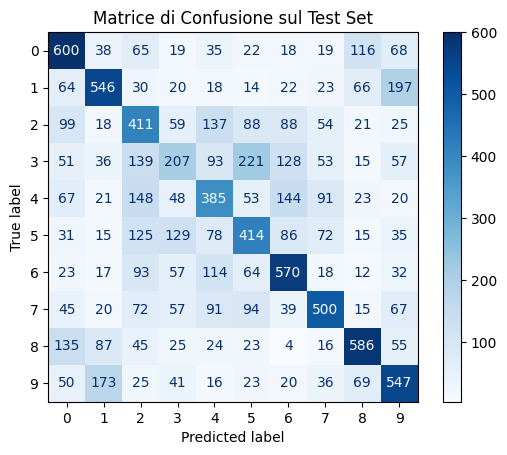


 Classification Report:

              precision    recall  f1-score   support

    airplane       0.52      0.60      0.55      1000
  automobile       0.56      0.55      0.55      1000
        bird       0.36      0.41      0.38      1000
         cat       0.31      0.21      0.25      1000
        deer       0.39      0.39      0.39      1000
         dog       0.41      0.41      0.41      1000
        frog       0.51      0.57      0.54      1000
       horse       0.57      0.50      0.53      1000
        ship       0.62      0.59      0.60      1000
       truck       0.50      0.55      0.52      1000

    accuracy                           0.48     10000
   macro avg       0.47      0.48      0.47     10000
weighted avg       0.47      0.48      0.47     10000



In [6]:
# === PARAM GRID ===
param_grid = {
    'hidden_layer_sizes': [(200,), (200, 100), (200, 100, 50)],
    'activation': ['relu'],
    'learning_rate_init': [0.001],
    'solver': ['adam'],
    'alpha': [1e-5, 1e-4],
}

common_params = {
    'random_state': 42,
    'warm_start': True,
    'verbose': False
}

n_total_epochs = 100
patience = 10
tolerance = 1e-4

best_val_acc = 0
best_params = None
best_model = None

# === TRAINING + EARLY STOPPING ===
for params in ParameterGrid(param_grid):
    print(f"\nTraining MLP con params: {params}")
    mlp = MLPClassifier(**common_params, **params, max_iter=1)
    

    best_val_accuracy_for_params = 0
    epochs_without_improvement = 0

    for epoch in range(n_total_epochs):
        
        mlp.fit(x_train, y_train)

        val_preds = mlp.predict(x_val)
        val_acc = accuracy_score(y_val, val_preds)
        print(f"Epoch {epoch+1}/{n_total_epochs} - Validation accuracy: {val_acc:.4f}")

        if val_acc > best_val_accuracy_for_params + tolerance:
            best_val_accuracy_for_params = val_acc
            epochs_without_improvement = 0
        else:
            epochs_without_improvement += 1

        if epochs_without_improvement >= patience:
            print(f"Early stopping all'epoca {epoch+1} per params {params}")
            break

    if best_val_accuracy_for_params > best_val_acc:
        best_val_acc = best_val_accuracy_for_params
        best_params = params
        best_model = mlp
        print(f"Nuovo best model: {best_params} - acc: {best_val_acc:.4f}")

# === VALUTAZIONE FINALE ===
print(f"\n Best params: {best_params}")
print(f" Best validation accuracy: {best_val_acc:.4f}")

test_preds = best_model.predict(x_test)
test_acc = accuracy_score(y_test, test_preds)
print(f" Test accuracy: {test_acc:.4f}")

# === MATRICE DI CONFUSIONE ===
cm = confusion_matrix(y_test, test_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Matrice di Confusione sul Test Set")
plt.show()

# === CLASSIFICATION REPORT ===
class_names_list = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]

report = classification_report(y_test, test_preds, target_names=class_names_list, zero_division=0)
print("\n Classification Report:\n")
print(report)


 Inizio training con Bagging...


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(



 Valutazione Bagging sul test set
 Test accuracy con Bagging: 0.5241


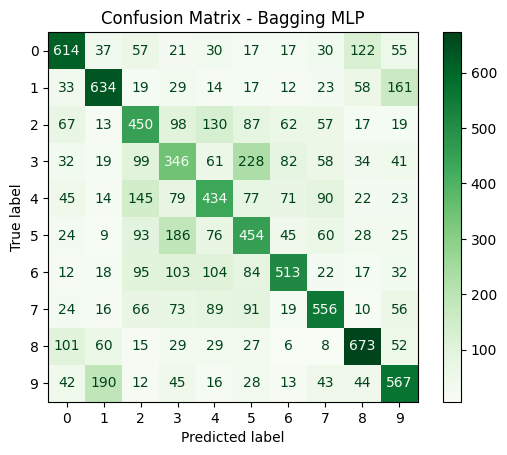


 Classification Report - Bagging MLP:

              precision    recall  f1-score   support

    airplane       0.62      0.61      0.62      1000
  automobile       0.63      0.63      0.63      1000
        bird       0.43      0.45      0.44      1000
         cat       0.34      0.35      0.34      1000
        deer       0.44      0.43      0.44      1000
         dog       0.41      0.45      0.43      1000
        frog       0.61      0.51      0.56      1000
       horse       0.59      0.56      0.57      1000
        ship       0.66      0.67      0.66      1000
       truck       0.55      0.57      0.56      1000

    accuracy                           0.52     10000
   macro avg       0.53      0.52      0.52     10000
weighted avg       0.53      0.52      0.52     10000



In [7]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# === Ricreo il miglior MLP SENZA warm_start e con max_iter alto ===
best_mlp_for_bagging = MLPClassifier(
    **best_params,
    max_iter=100,
    random_state=42,
    warm_start=False,  # Bagging non supporta warm_start
    verbose=False
)

# === BaggingClassifier ===
bagging_clf = BaggingClassifier(
    base_estimator=best_mlp_for_bagging,
    n_estimators=5,
    max_samples=0.8,
    max_features=1.0,
    bootstrap=True,
    n_jobs=-1,
    random_state=42
)

print("\n Inizio training con Bagging...")
bagging_clf.fit(x_train, y_train)

# === Valutazione ===
print("\n Valutazione Bagging sul test set")
bag_test_preds = bagging_clf.predict(x_test)
bag_test_acc = accuracy_score(y_test, bag_test_preds)
print(f" Test accuracy con Bagging: {bag_test_acc:.4f}")

# === MATRICE DI CONFUSIONE ===
cm_bag = confusion_matrix(y_test, bag_test_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_bag)
disp.plot(cmap='Greens')
plt.title("Confusion Matrix - Bagging MLP")
plt.show()

# === CLASSIFICATION REPORT ===
bag_report = classification_report(y_test, bag_test_preds, target_names=class_names_list, zero_division=0)
print("\n Classification Report - Bagging MLP:\n")
print(bag_report)
